In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

from matplotlib.ticker import FuncFormatter

In [2]:
labelsize = 15

In [3]:
def scientific_tex_formatter(x, pos):
    if x == 0.:
        return r'$0$'
    
    str_ = "%.1e" % x
    
    #str_ = str_.replace('1.0', '')
    str_ = str_.replace('e-0', '\,\,10^{-')
    str_ = str_.replace('e+0', '\,\,10^{')
    
    str_ = str_ + '}'
    str_ = r'$%s$' % str_
    
    return str_

f_scientific_tex_formatter = FuncFormatter(scientific_tex_formatter)

def scientific_tex_formatter2(x, pos):
    if x == 1.:
        return r'$1$'
    
    str_ = "%.1e" % x
    
    str_ = str_.replace('1.0', '')
    str_ = str_.replace('e-0', '\,\,10^{-')
    str_ = str_.replace('e+0', '\,\,10^{')
    
    str_ = str_ + '}'
    str_ = r'$%s$' % str_
    
    return str_

f_scientific_tex_formatter2 = FuncFormatter(scientific_tex_formatter2)

In [4]:
def tex_foramtter(x, pos):
    return r'$\rm{%s}$' % x

f_tex_foramtter = FuncFormatter(tex_foramtter)

def tex_transf(x):
    return r'$\rm{%s}$' % x

In [5]:
def tex_pct_formatter(x, pos):
    return r'$%.0f \%%$' % x

f_tex_pct_formatter = FuncFormatter(tex_pct_formatter)

In [6]:
import pandas as pd
import numpy as np

import os

In [7]:
dir_res_ = './results'

In [8]:
l1_6 = pd.read_csv(os.path.join(dir_res_, 'l1_nu_eq_6.csv'), header=0, index_col=0)[r'$\nu = 6$ bounds']
l3_6 = pd.read_csv(os.path.join(dir_res_, 'l3_nu_eq_6.csv'), header=0, index_col=0)[r'$\nu = 6$ bounds']
im_6 = pd.read_csv(os.path.join(dir_res_, 'IM_nu_eq_6.csv'), header=0, index_col=0)['99.0']

# Diff $\ell_1$ and $\ell_3$

In [9]:
l13 = pd.DataFrame()

l13[r'$\ell_1$'] = l1_6
l13[r'$\ell_3$'] = l3_6

for col in l13.columns:
    l13[col] = l13[col] / l13[col].sum() * 100.

In [10]:
l13[r'$\ell_3 \,\, \rm{vs.} \,\, \ell_1$'] = (l13[r'$\ell_3$'] - l13[r'$\ell_1$']) / l13[r'$\ell_1$'] * 100

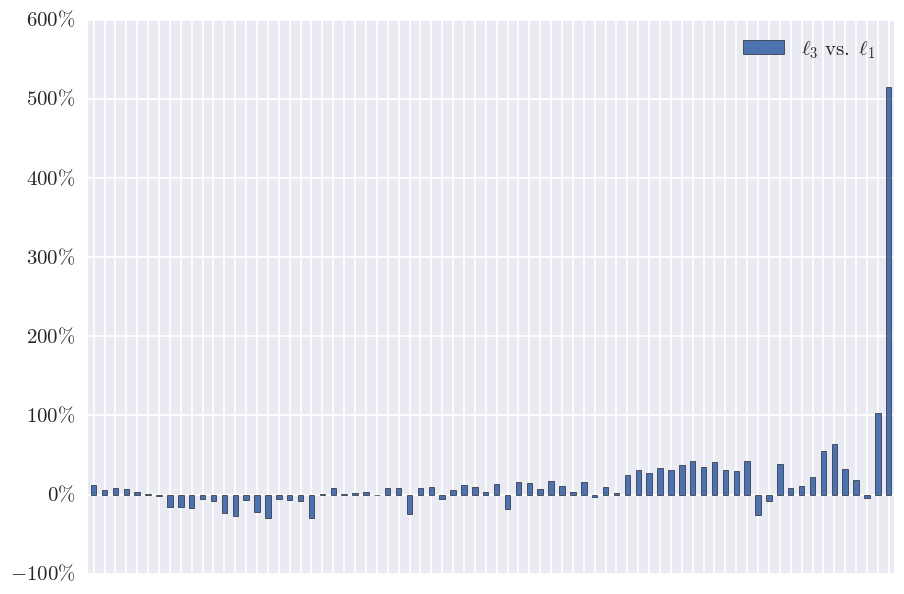

In [11]:
f, ax = plt.subplots()

l13.sort_values(r'$\ell_1$')[::-1][r'$\ell_3 \,\, \rm{vs.} \,\, \ell_1$'].plot.bar(ax=ax)

labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

ax.yaxis.set_major_formatter(f_tex_pct_formatter)

plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.legend(fontsize=labelsize)

plt.show()

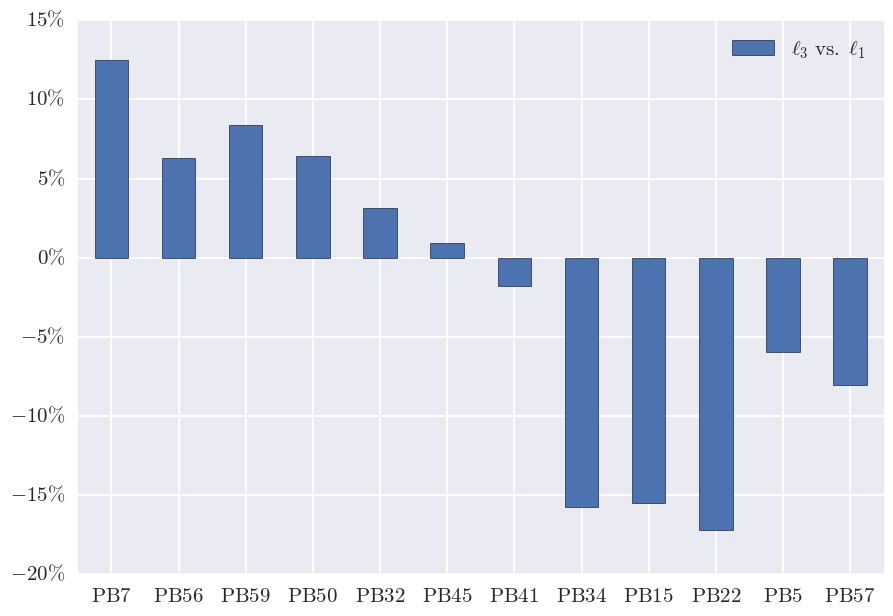

In [12]:
f, ax = plt.subplots()

l13.sort_values(r'$\ell_1$')[::-1][r'$\ell_3 \,\, \rm{vs.} \,\, \ell_1$'][:12].plot.bar(ax=ax)

labels = [tex_transf(item.get_text()) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

for label in ax.get_xticklabels():
    label.set_rotation(0) 

ax.yaxis.set_major_formatter(f_tex_pct_formatter)

plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.legend(fontsize=labelsize)

plt.show()

# Diff $\ell_1$ and IM 99%

In [13]:
l1IM = pd.DataFrame()

l1IM[r'$\ell_1$'] = l1_6
l1IM[r'$99\% IM$'] = im_6

for col in l1IM.columns:
    l1IM[col] = l1IM[col] / l1IM[col].sum() * 100.

In [14]:
l1IM[r'$\ell_1 \,\, \rm{vs.} \,\, 99\% IM$'] = (l1IM[r'$\ell_1$'] - l1IM[r'$99\% IM$']) / l1IM[r'$99\% IM$'] * 100

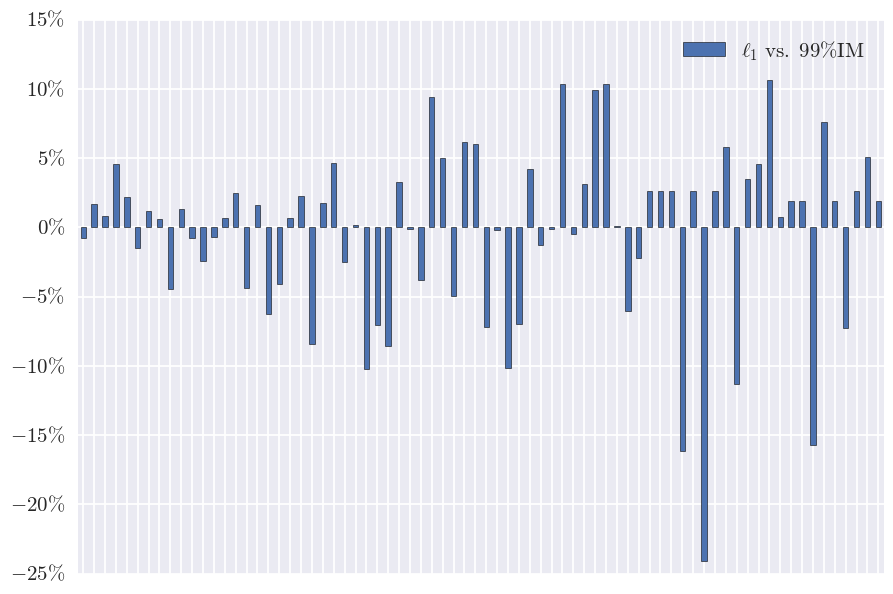

In [15]:
f, ax = plt.subplots()

l1IM.sort_values(r'$\ell_1$')[::-1][r'$\ell_1 \,\, \rm{vs.} \,\, 99\% IM$'].plot.bar(ax=ax)

labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

ax.yaxis.set_major_formatter(f_tex_pct_formatter)

plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.legend(fontsize=labelsize, loc='best')

plt.show()

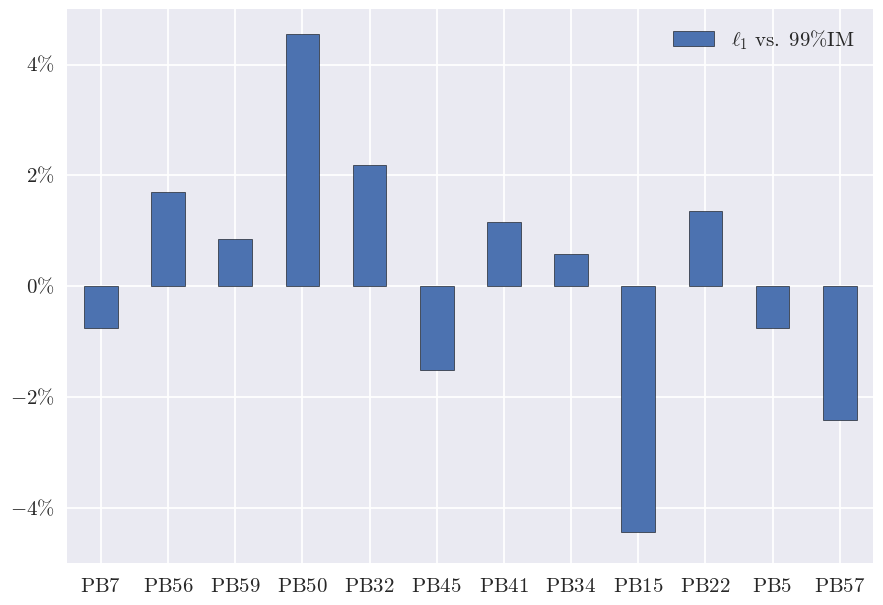

In [16]:
f, ax = plt.subplots()

l1IM.sort_values(r'$\ell_1$')[::-1][r'$\ell_1 \,\, \rm{vs.} \,\, 99\% IM$'][:12].plot.bar(ax=ax)

labels = [tex_transf(item.get_text()) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

for label in ax.get_xticklabels():
    label.set_rotation(0) 

ax.yaxis.set_major_formatter(f_tex_pct_formatter)

plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.legend(fontsize=labelsize)

plt.show()

# Diff $\ell_3$ and IM 99%

In [17]:
l3IM = pd.DataFrame()

l3IM[r'$\ell_1$'] = l1_6
l3IM[r'$\ell_3$'] = l3_6
l3IM[r'$99\% IM$'] = im_6

for col in l3IM.columns:
    l3IM[col] = l3IM[col] / l3IM[col].sum() * 100.

In [18]:
l3IM[r'$\ell_3 \,\, \rm{vs.} \,\, 99\% IM$'] = (l3IM[r'$\ell_3$'] - l3IM[r'$99\% IM$']) / l3IM[r'$99\% IM$'] * 100

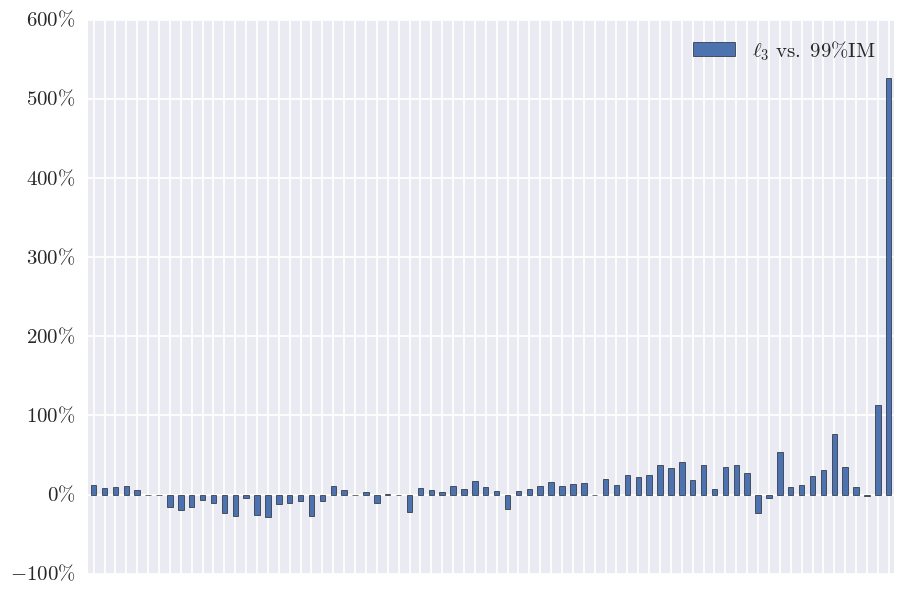

In [19]:
f, ax = plt.subplots()

l3IM.sort_values(r'$\ell_1$')[::-1][r'$\ell_3 \,\, \rm{vs.} \,\, 99\% IM$'].plot.bar(ax=ax)

labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

ax.yaxis.set_major_formatter(f_tex_pct_formatter)

plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.legend(fontsize=labelsize, loc='best')

plt.show()

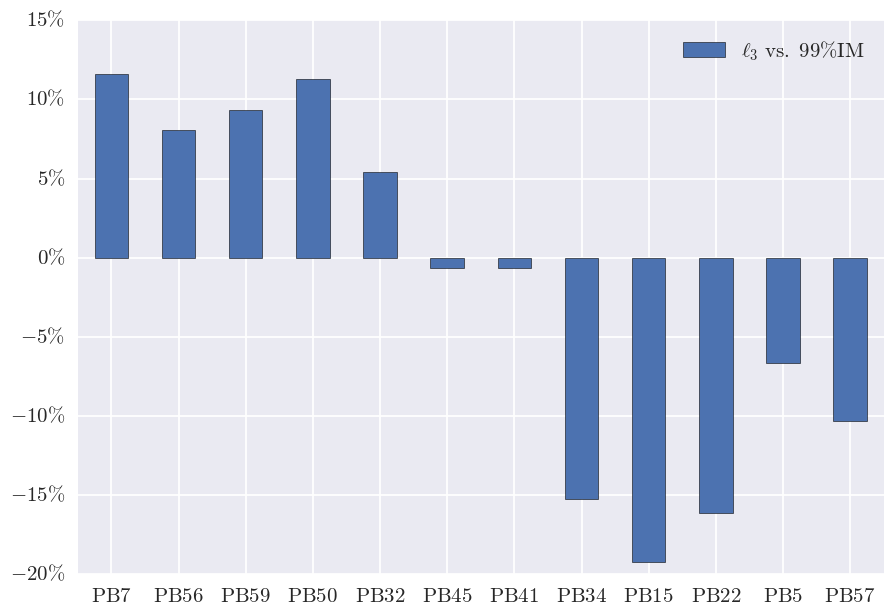

In [20]:
f, ax = plt.subplots()

l3IM.sort_values(r'$\ell_1$')[::-1][r'$\ell_3 \,\, \rm{vs.} \,\, 99\% IM$'][:12].plot.bar(ax=ax)

labels = [tex_transf(item.get_text()) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

for label in ax.get_xticklabels():
    label.set_rotation(0) 

ax.yaxis.set_major_formatter(f_tex_pct_formatter)

plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.legend(fontsize=labelsize)

plt.show()